In [1]:
import os
import sys
import numpy as np


myPath = os.path.dirname(os.path.abspath('../sge/sge'))
sys.path.insert(0, myPath)
from filesIO import FileIOHandler as fh
from processor import GainsProcessor as gp
# from plotter import plot_delays
from plotting_utils import ColorbarInnerPosition, ColorbarSetting
from plotter import GainsUtils, pols
import matplotlib.pyplot as plt

import logging
logging.getLogger().setLevel(logging.INFO) #replace INFO with CRITICAL to disable all log messages

2024-07-01 10:21:46,668 - matplotlib data path: /home/users/chege/miniconda3/envs/py310/lib/python3.10/site-packages/matplotlib/mpl-data
2024-07-01 10:21:46,674 - CONFIGDIR=/home/users/chege/.config/matplotlib
2024-07-01 10:21:46,676 - interactive is False
2024-07-01 10:21:46,677 - platform is linux
2024-07-01 10:21:46,701 - CACHEDIR=/home/users/chege/.cache/matplotlib
2024-07-01 10:21:46,704 - Using fontManager instance from /home/users/chege/.cache/matplotlib/fontlist-v330.json


In [2]:
# solsfiles = "/home/users/chege/mysoftware/sge/notebooks/data/solutions_files.txt"
solsfiles = "/home/users/chege/mysoftware/sge/notebooks/data/solutions_files_dd.txt"
assert os.path.isfile(solsfiles)
solutions_files_list = fh.read_lines_from_file(solsfiles)
print(len(solutions_files_list))

65


In [3]:
(
    data,
    all_freqs,
    nClustEff,
    bandwidth,
    sol_timestep,
    nClust,
) = gp.convert_solutions(solutions_files_list, [])

2024-07-01 10:21:47,886 - Successfully read file: /net/node110/data/users/lofareor/chege/NCP/redshift1/L246297/results_nxt_t2/solutions_sagecal_mpi_dd/L246297_SAP000_SB161_uv_003_nxt.MS.solutions
2024-07-01 10:21:48,346 - Successfully read file: /net/node110/data/users/lofareor/chege/NCP/redshift1/L246297/results_nxt_t2/solutions_sagecal_mpi_dd/L246297_SAP000_SB162_uv_003_nxt.MS.solutions
2024-07-01 10:21:48,801 - Successfully read file: /net/node110/data/users/lofareor/chege/NCP/redshift1/L246297/results_nxt_t2/solutions_sagecal_mpi_dd/L246297_SAP000_SB163_uv_003_nxt.MS.solutions
2024-07-01 10:21:49,257 - Successfully read file: /net/node110/data/users/lofareor/chege/NCP/redshift1/L246297/results_nxt_t2/solutions_sagecal_mpi_dd/L246297_SAP000_SB164_uv_003_nxt.MS.solutions
2024-07-01 10:21:49,712 - Successfully read file: /net/node110/data/users/lofareor/chege/NCP/redshift1/L246297/results_nxt_t2/solutions_sagecal_mpi_dd/L246297_SAP000_SB165_uv_003_nxt.MS.solutions
2024-07-01 10:21:50,

In [ ]:
time_hrs = np.linspace(0, sol_timestep * data.shape[0], data.shape[0]) / 60

##### You can get more metadata from one of the calibrated MS if available

In [4]:
ms = "/net/node115/data/users/lofareor/chege/NCP/redshift1/L246297/L246297_SAP000_SB224_uv_003_nxt.MS/"

In [5]:
(
    timerange,
    data_timestep,
    pointing,
    stations,
    station_pos,
) = fh.getMSinfo(ms)

Successful readonly open of default-locked table /net/node115/data/users/lofareor/chege/NCP/redshift1/L246297/L246297_SAP000_SB224_uv_003_nxt.MS/: 26 columns, 11642225 rows
Successful readonly open of default-locked table /net/node115/data/users/lofareor/chege/NCP/redshift1/L246297/L246297_SAP000_SB224_uv_003_nxt.MS/FIELD: 10 columns, 1 rows
Successful readonly open of default-locked table /net/node115/data/users/lofareor/chege/NCP/redshift1/L246297/L246297_SAP000_SB224_uv_003_nxt.MS/ANTENNA: 10 columns, 70 rows
Successful readonly open of default-locked table /net/node115/data/users/lofareor/chege/NCP/redshift1/L246297/L246297_SAP000_SB224_uv_003_nxt.MS/ANTENNA: 10 columns, 70 rows
2024-07-01 10:22:24,150 - MS Timerange (s): [4920799590.00695, 4920846495.118298]
2024-07-01 10:22:24,151 - MS timestep (s): 10.0139008
2024-07-01 10:22:24,152 - MS pointing (ra, dec): [[0.         1.57079633]]
2024-07-01 10:22:24,152 - MS stations total: 70, ['CS001HBA0', 'CS001HBA1', 'CS002HBA0', 'CS002HB

In [6]:
data.shape

(40, 70, 65, 4, 152)

##### Plot the gains

In [19]:
def plot_gains_tseries(sage_gains, cluster_idx=0):
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(8, 5), dpi=300, sharex=True)

    ccs = {"XX": "b", "XY": "r", "YX": "b", "YY": "r"}
    rcs = {"XX": "k", "XY": "gray", "YX": "k", "YY": "gray"}
    nax = [0, 1, 1, 0]

    for p, (pol, x) in enumerate(zip(ccs.keys(), nax)):
        ax = axes[x]

        gains = np.abs(sage_gains[:, :48, :, p, cluster_idx])
        ax.plot(time_hrs, gains.mean(axis=2), alpha=0.99, c=ccs[pol], lw=0.5, label=pol)

        rgains = np.abs(sage_gains[:, 48:, :, p, cluster_idx])
        ax.plot(
            time_hrs, rgains.mean(axis=2), alpha=0.99, c=rcs[pol], lw=0.5, label=pol
        )

    axes[1].set_yscale("log")
    axes[0].set_yscale("log")
    axes[1].set_xlabel("Time [hrs]")
    axes[0].set_ylabel(r"$\left\langle|g|\right\rangle_{nu}$")
    axes[1].set_ylabel(r"$\left\langle|g|\right\rangle_{\nu}$")
    fig.suptitle(f"Gains time-series per station", fontsize=12)
    fig.tight_layout(pad=0.4)
    plt.show()

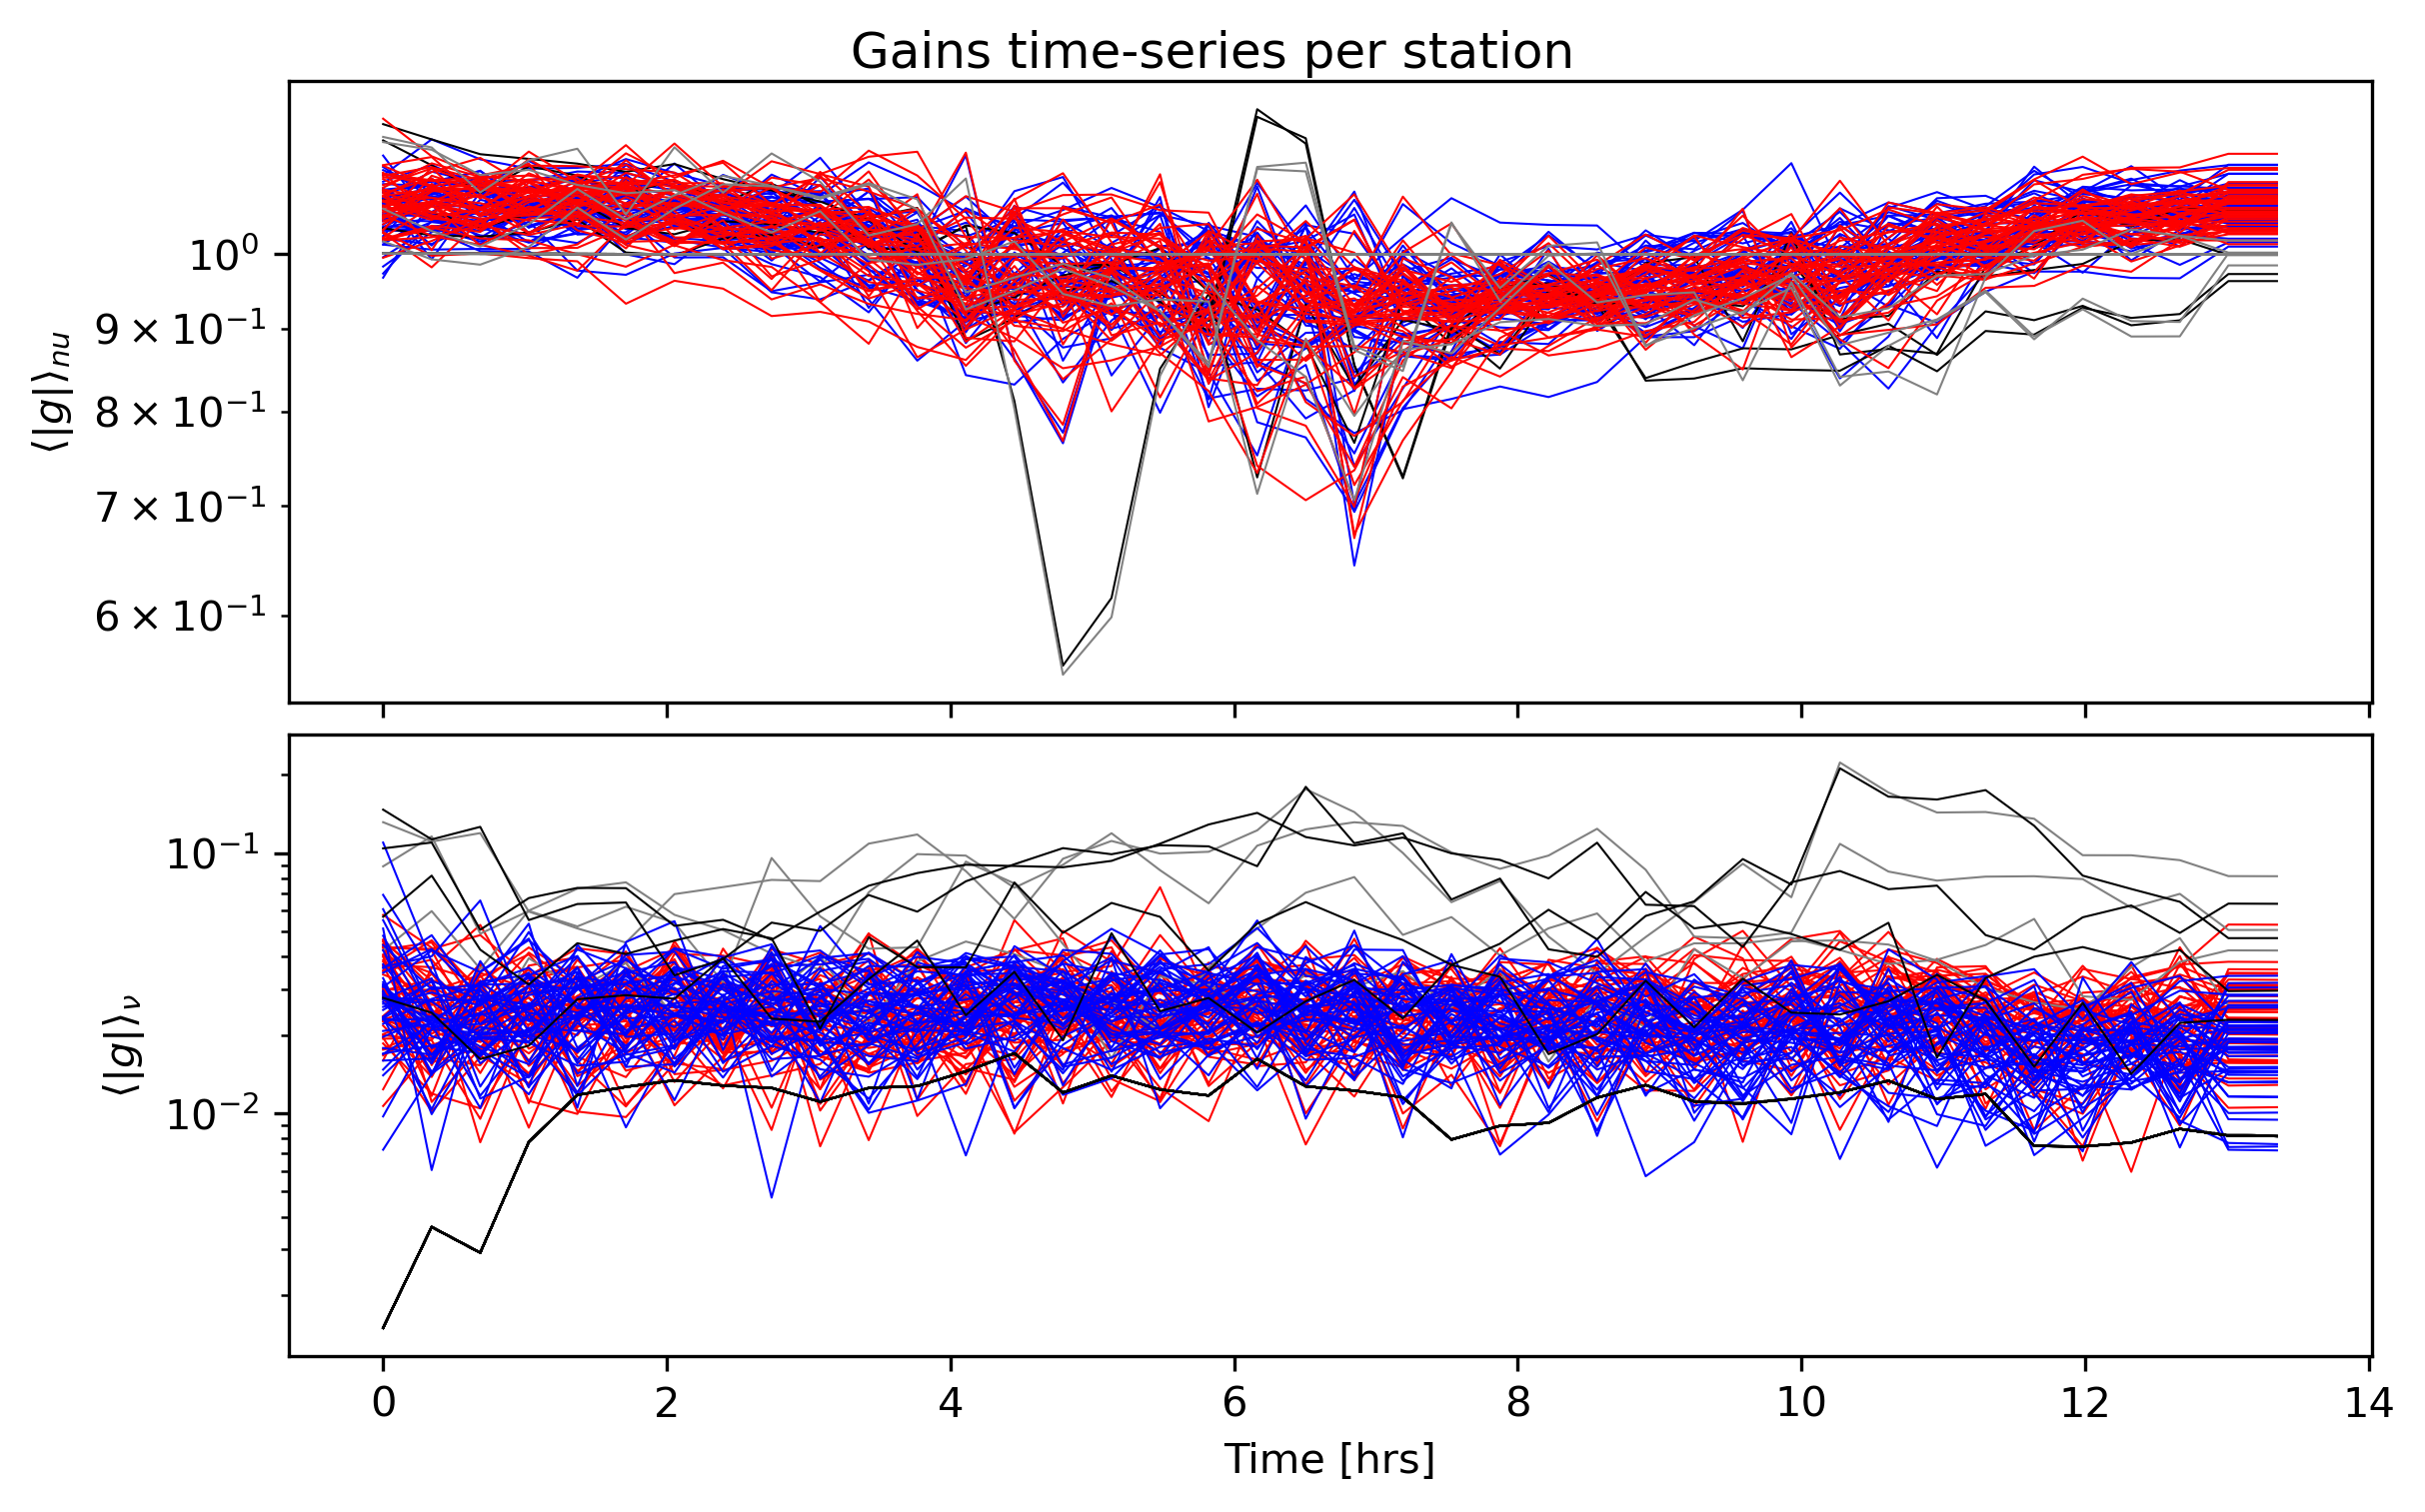

In [20]:
plot_gains_tseries(data, cluster_idx=10)

In [20]:
def plot_gains(sage_gains, cluster_idx=0):
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(8, 5), dpi=300, sharex=True)

    ccs = {"XX": "b", "XY": "r", "YX": "b", "YY": "r"}
    rcs = {"XX": "k", "XY": "gray", "YX": "k", "YY": "gray"}
    nax = [0, 1, 1, 0]

    for p, (pol, x) in enumerate(zip(ccs.keys(), nax)):
        ax = axes[x]

        gains = np.abs(sage_gains[:, :48, :, p, cluster_idx])
        ax.plot(
            all_freqs, gains.mean(axis=0).T, alpha=0.99, c=ccs[pol], lw=0.5, label=pol
        )

        rgains = np.abs(sage_gains[:, 48:, :, p, cluster_idx])
        ax.plot(
            all_freqs, rgains.mean(axis=0).T, alpha=0.99, c=rcs[pol], lw=0.5, label=pol
        )

    axes[1].set_xlabel("Frequency \; [MHz]")
    # axes[1].set_xlabel(r"$Frequency \; [MHz]$")
    axes[0].set_ylabel(r"$\left\langle|g|\right\rangle_{t}$")
    axes[1].set_ylabel(r"$\left\langle|g|\right\rangle$_{t}")
    fig.suptitle(f"Cluster {cluster_idx}: gains spectrum per station: ", fontsize=12)
    fig.tight_layout(pad=0.4)
    plt.show()

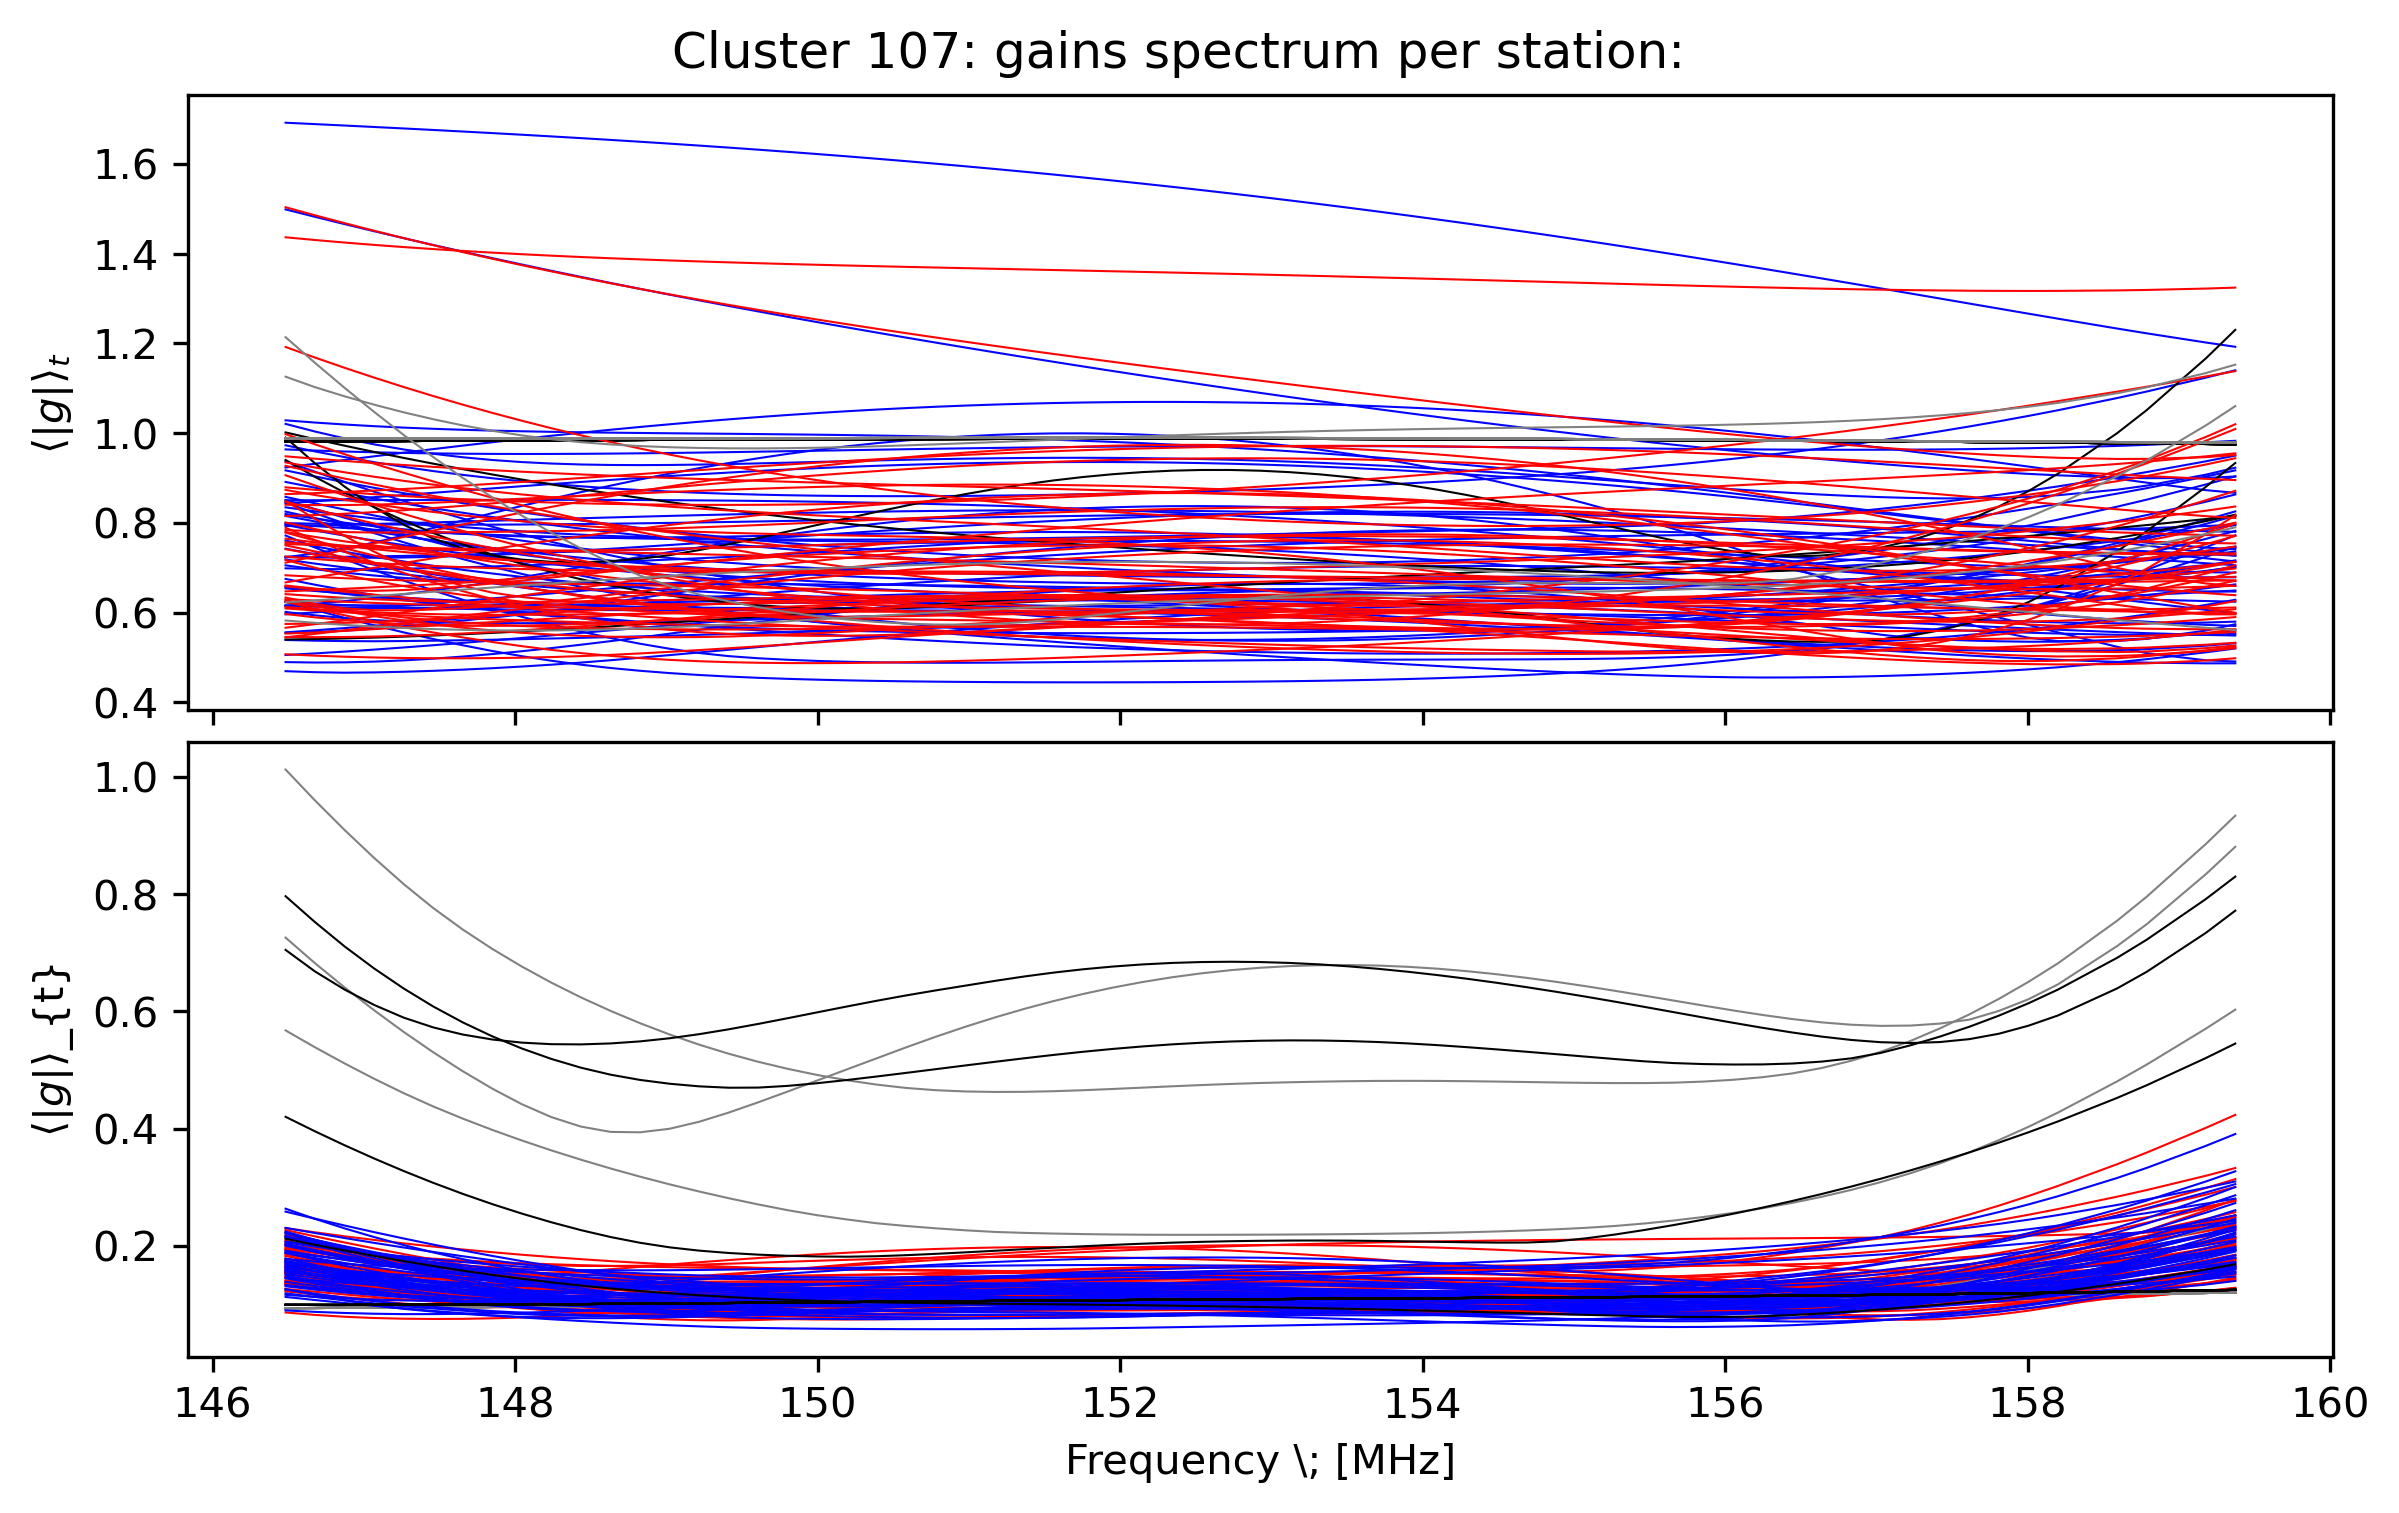

In [22]:
plot_gains(data, cluster_idx=107)

In [12]:

def plot_delays(sage_gains, df, stations, cluster_idx=0):
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(6, 2.5), dpi=300, sharey=True)

    cs = {"XX": "b", "XY": "r", "YX": "b", "YY": "r"}
    nax = [0, 1, 1, 0]

    for p, (pol, x) in enumerate(zip(cs.keys(), nax)):
        ax = axes[x]
        gains = np.abs(sage_gains[:, :48, :, p, cluster_idx])
        delay, ps = GainsUtils.get_ps(gains, df)
        # ps /= np.max(ps)

        ax.plot(
            delay * 1e3, ps.mean(axis=0).T, alpha=0.99, c=cs[pol], lw=0.5, label=pol
        )
        ax.set_yscale("log")

    axes[0].set_xlabel(r"$Delays \; [\mu s]$")
    axes[1].set_xlabel(r"$Delays \; [\mu s]$")
    # axes[0].set_ylabel(r"$\left\langleF(|g|)\right\rangle$")
    axes[0].set_ylabel(r"$\left\langleF(|g|)\right\rangle$")
    fig.suptitle(f"Time-averaged delay spectrum", fontsize=12)
    fig.tight_layout(pad=0.4)
    plt.show()

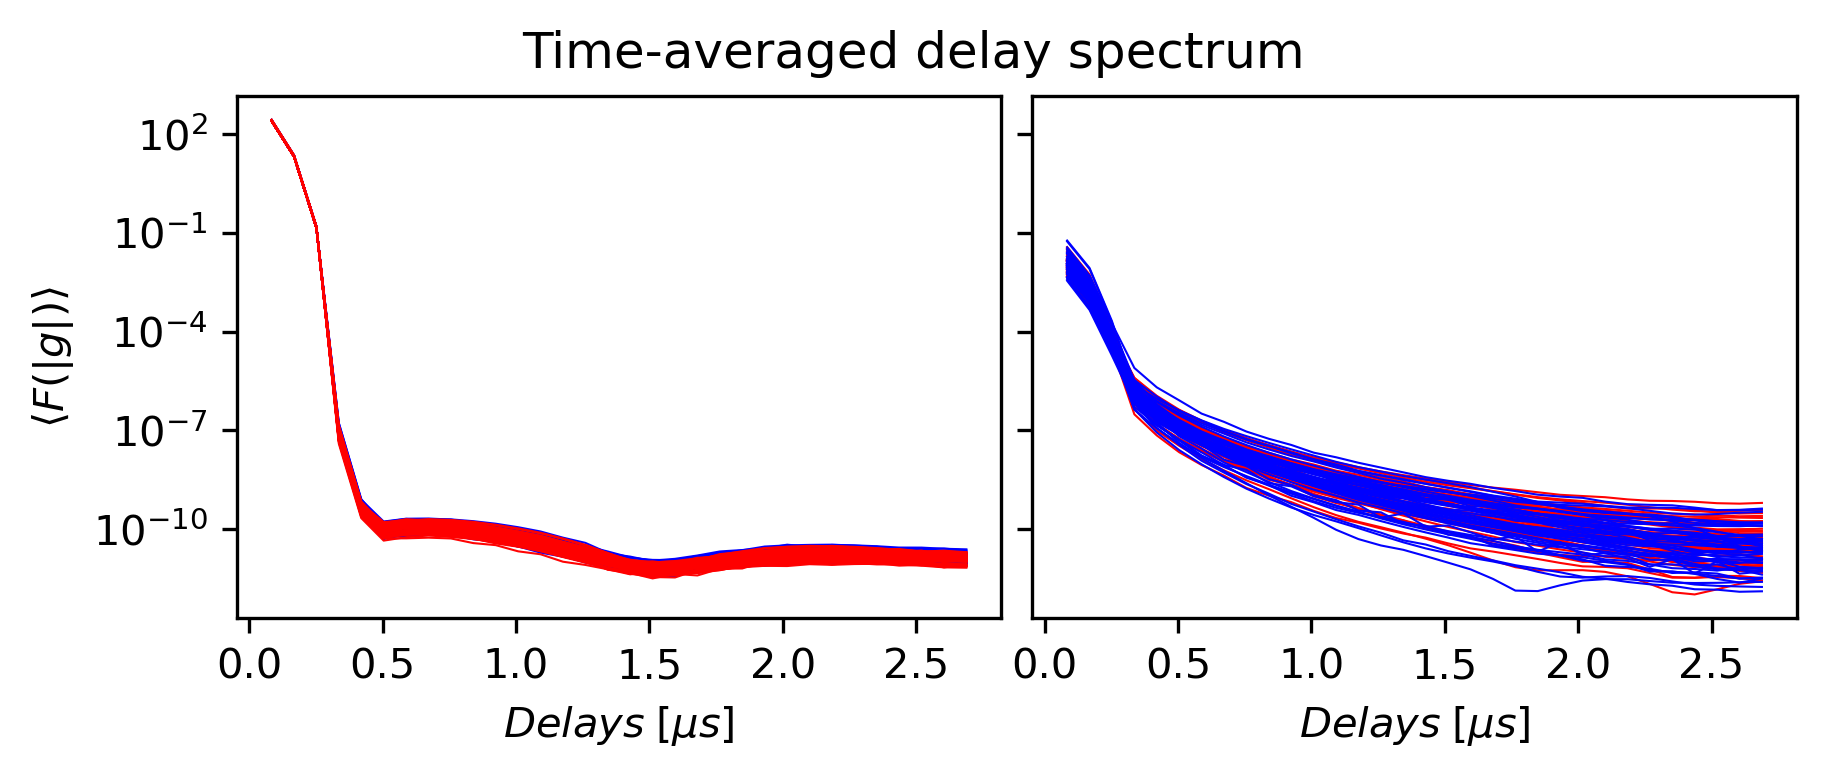

In [13]:
plot_delays(data, bandwidth * 1e3, stations)

In [14]:
def plot_gains_grid(sage_gains, stations, cluster_idx=0, ylims=[0,2]):
    fig, axes = plt.subplots(
        ncols=7, nrows=10, figsize=(20, 20), dpi=300, sharey=True, sharex=True
    )
    axes = axes.flatten()
    pols_idx=[0,3,1,2]
    cs = {"XX": "b", "YY": "r", "XY": "orange", "YX": "k"}
    lss = {"XX": "-", "YY": "--",  "XY": "-", "YX": "--"}

    for p, (pol, idx) in enumerate(zip(cs.keys(), pols_idx)):

        for ss, st in enumerate(stations):
            ax = axes[ss]

            gains = np.abs(sage_gains[:, ss, :, idx, cluster_idx]).mean(axis=0).T

            ax.plot(
                all_freqs, gains, alpha=0.99, c=cs[pol], ls=lss[pol], lw=2, label=pol
            )

            ax.text(
                0.05,
                0.95,
                f"{st}",
                transform=ax.transAxes,
                va="top",
                ha="left",
                fontsize=10,
            )

        ax.set_ylim(ylims[0], ylims[1])
        ax.grid

    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

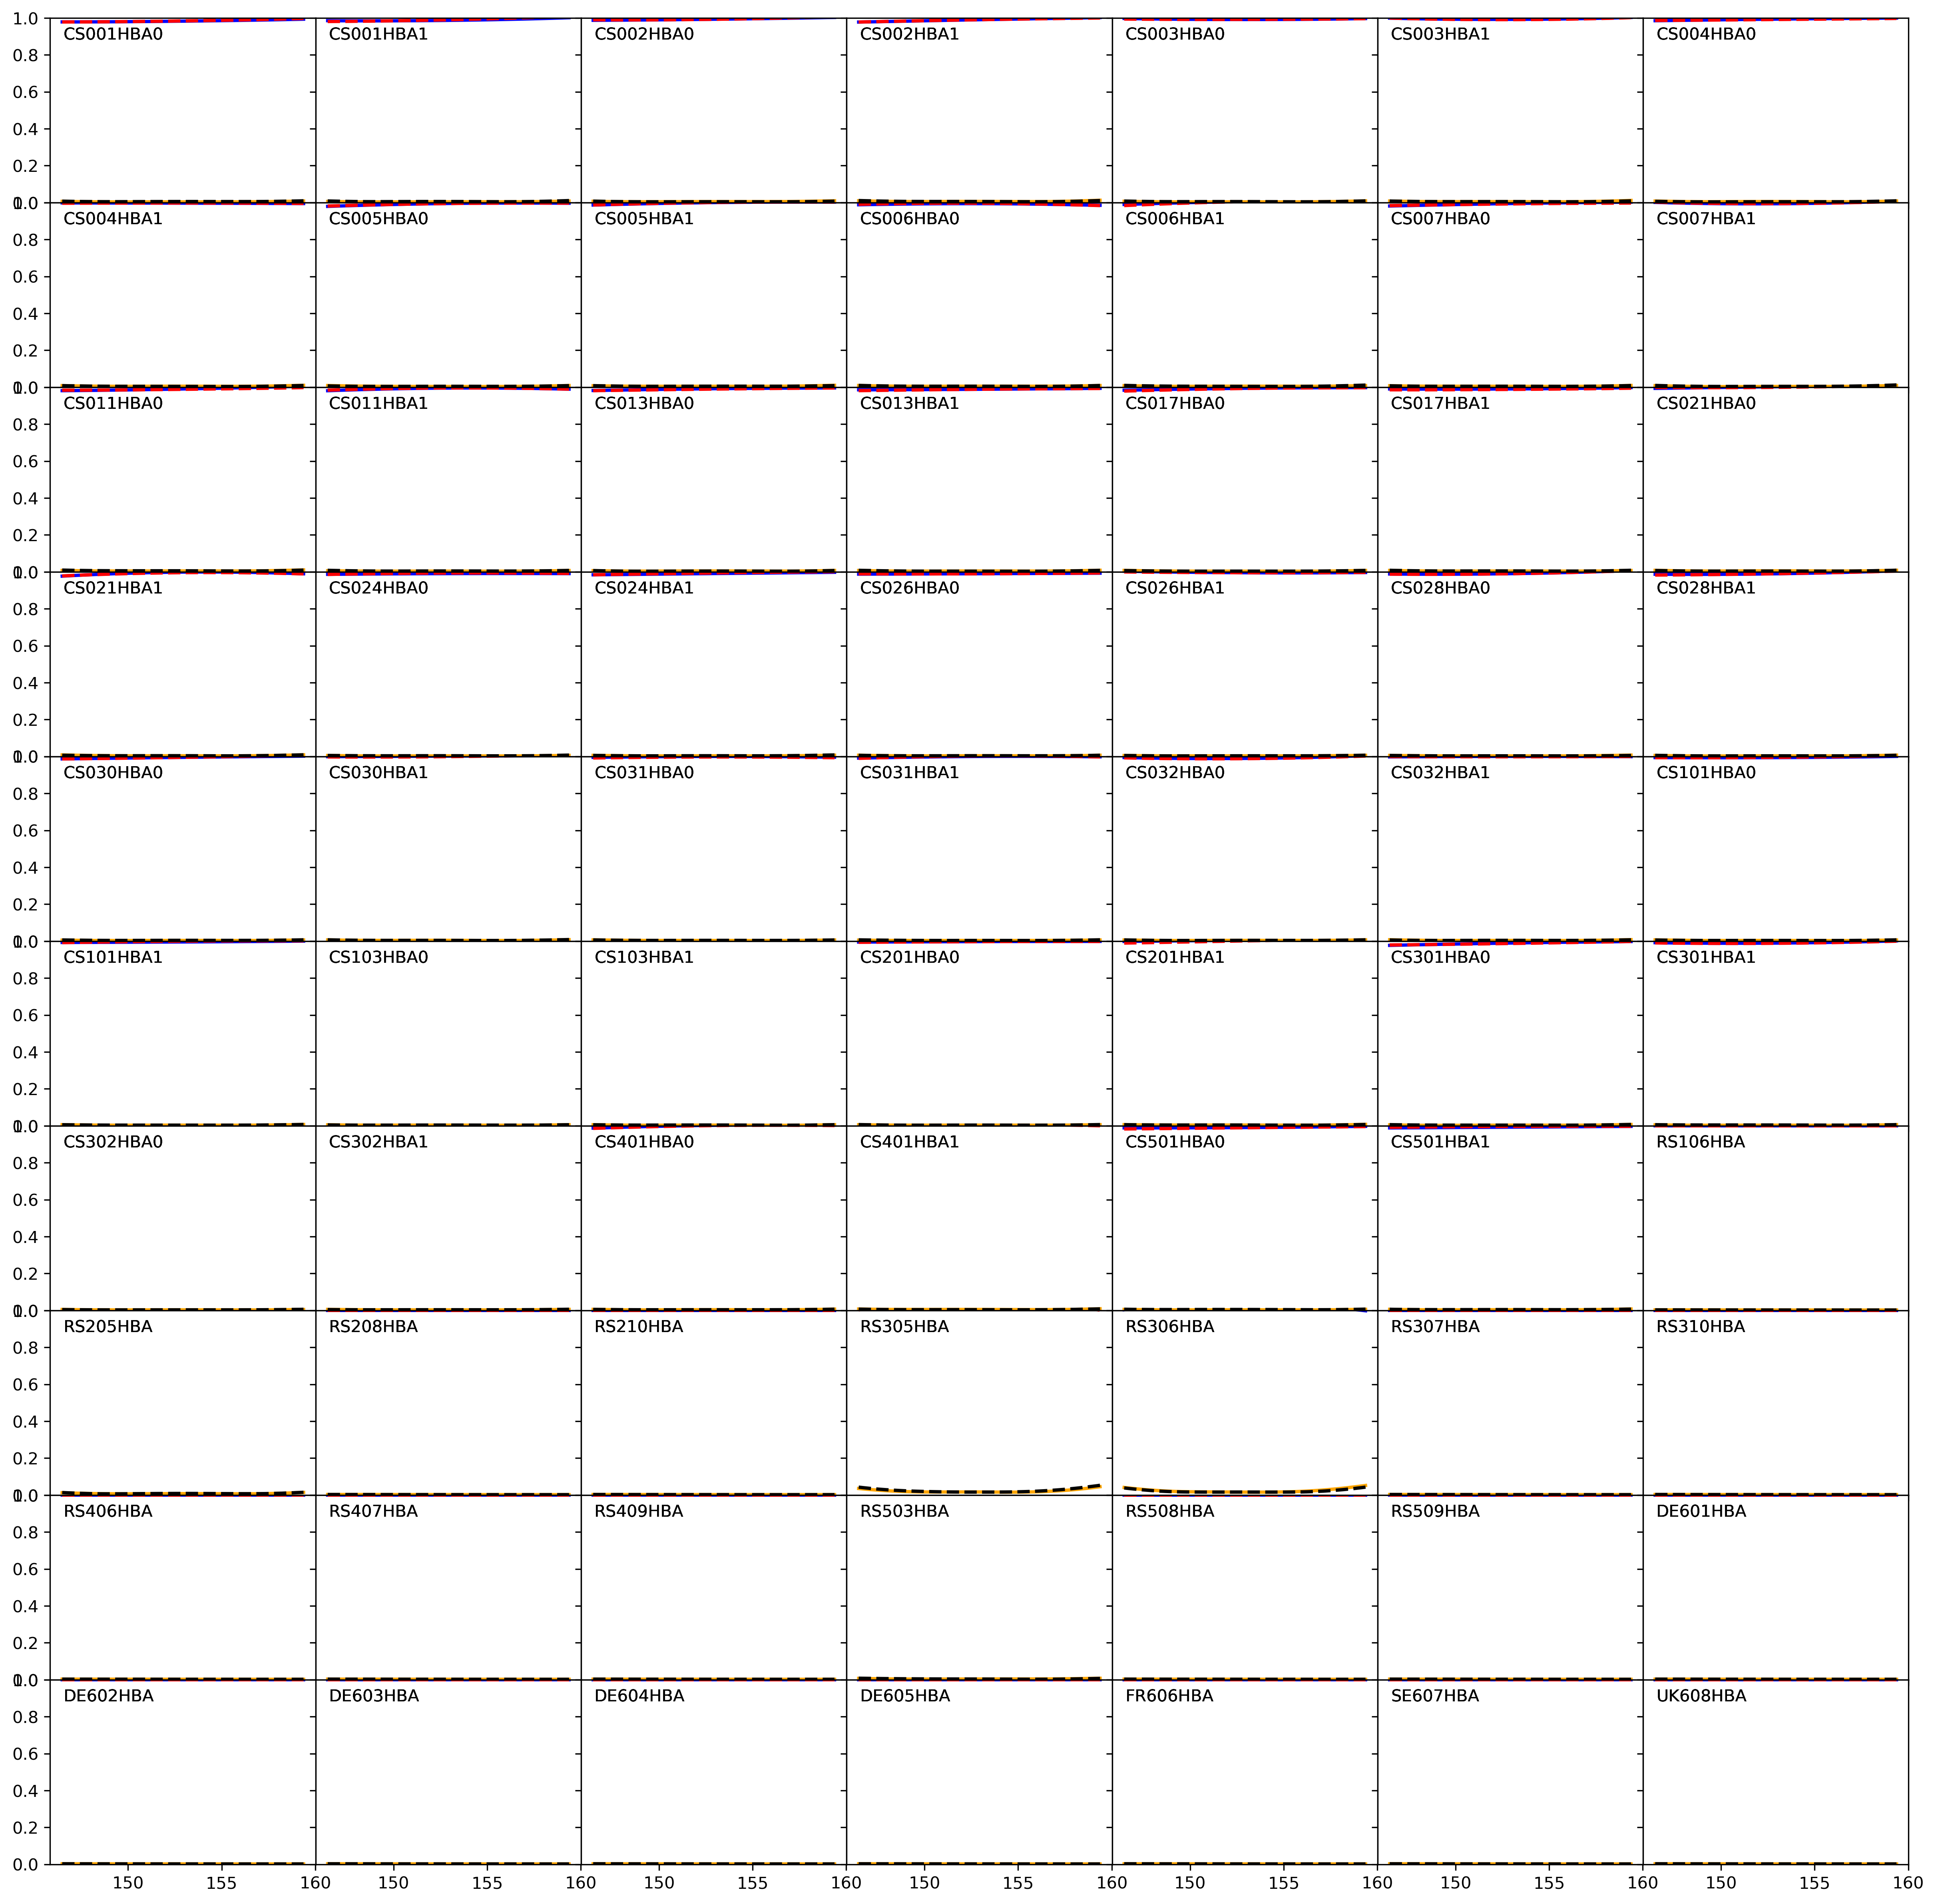

In [15]:
plot_gains_grid(data, stations, cluster_idx=1, ylims=[-0.3, 2])

In [16]:
def plot_delays_grid(sage_gains, stations, df, cluster_idx=0):
    fig, axes = plt.subplots(ncols=7, nrows=10, figsize=(20, 20), dpi=300, sharey=True, sharex=True)
    axes = axes.flatten()
    cs = {"XX": "b", "YY": "r"}  # "XY": "orange", "YX": "k",
    lss = {"XX": "-", "YY": "--"}  # "XY": "-", "YX": "--",
    pols_idx=[0,3]
    for p, (pol, idx) in enumerate(zip(cs.keys(), pols_idx)):
        ggains = np.abs(sage_gains[:, :, :, idx, cluster_idx])
        delay, ps = GainsUtils.get_ps(ggains, df)
        for ss, st in enumerate(stations):
            ax=axes[ss]
            ax.text(
                0.05,
                0.95,
                f"{st}",
                transform=ax.transAxes,
                va="top",
                ha="left",
                fontsize=10,
            )

            ax.plot(
                delay * 1e3, ps[:,ss,:].mean(axis=0).T, alpha=0.99, c=cs[pol], ls=lss[pol], lw=2, label=pol
            )

        ax.set_yscale("log")
        ax.set_ylim(1e-13, 1e2)

    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

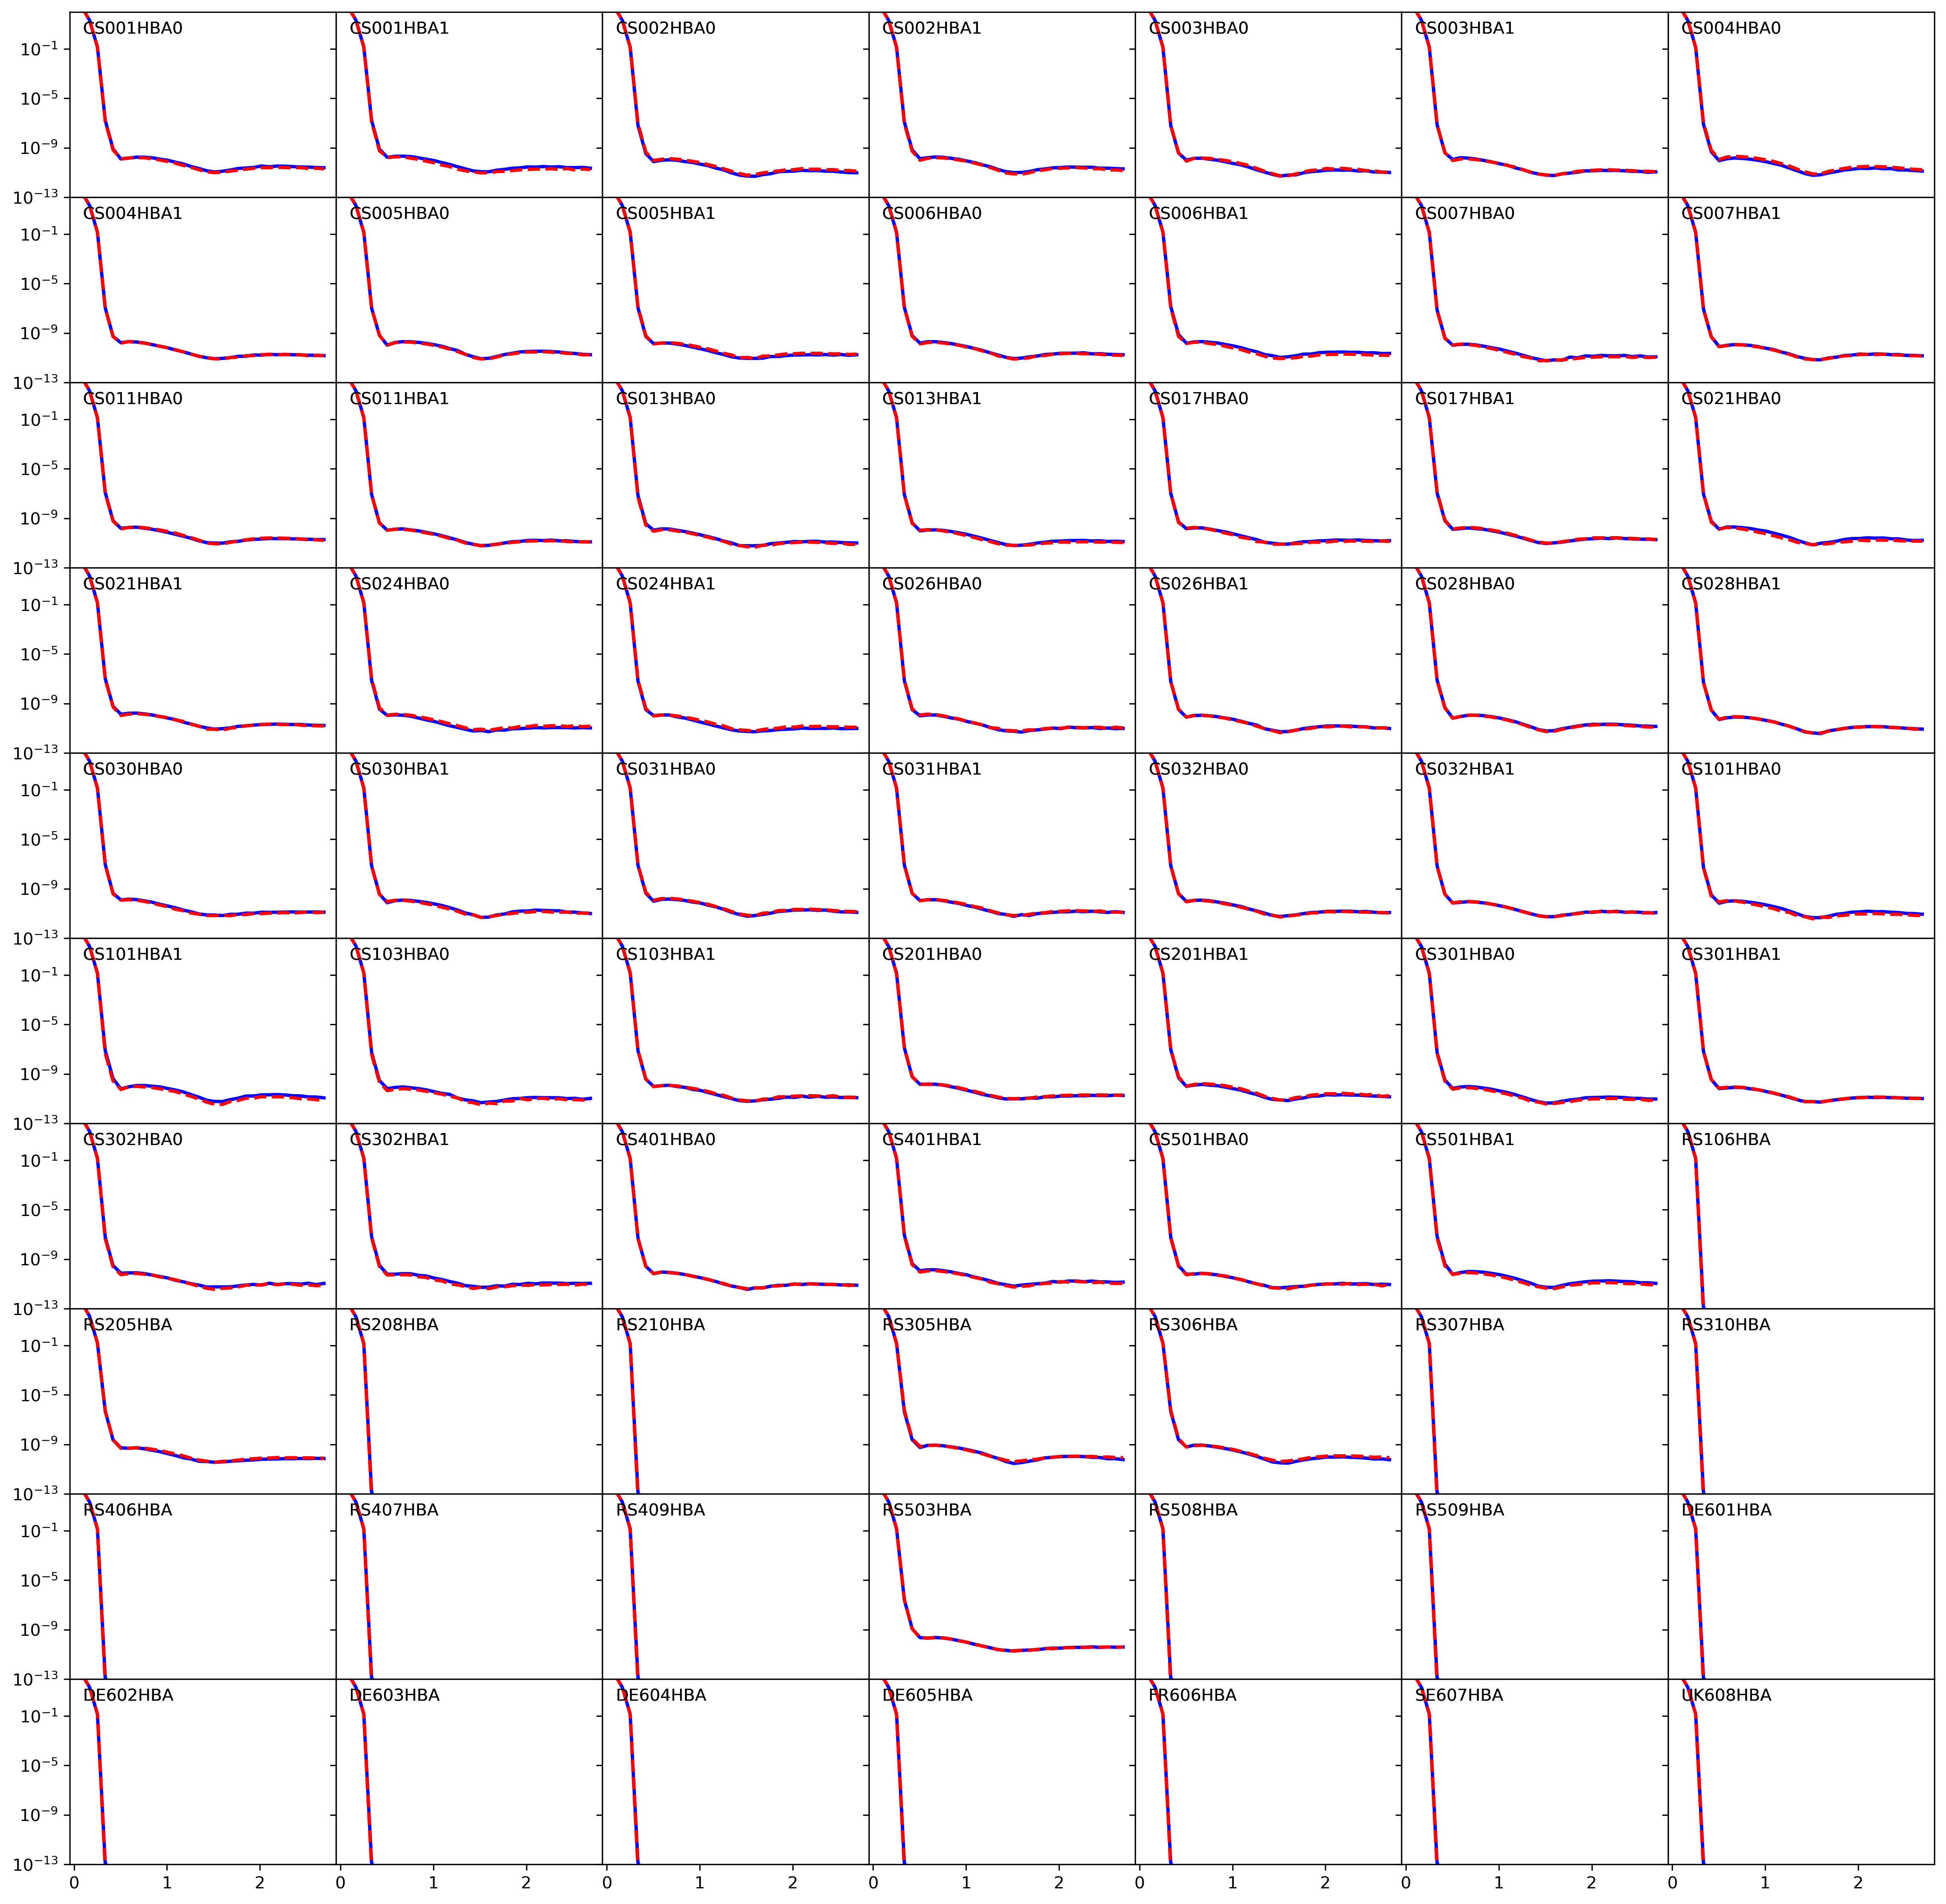

In [17]:
plot_delays_grid(data, stations, bandwidth * 1e3)

In [18]:

def plot_dynspec(sage_gains, stations, cluster_idx=0, pol="XX"):
    fig, axes = plt.subplots(ncols=7, nrows=10, figsize=(10, 10), dpi=150, sharex=True, sharey=True)
    axes=axes.flatten()
    pols = {"XX": 0, "XY": 1, "YX": 2, "YY": 3}
    nax = [0, 1, 1, 0]

    for s, st in enumerate(stations):
        ax=axes[s]
        gains = np.abs(sage_gains[:, s, :, pols[pol], cluster_idx])

        im_map=ax.pcolormesh(
            all_freqs,
            time_hrs,
            gains,
            alpha=0.5,
            lw=0.1,
            label=pol,
            vmin=0,
            vmax=2,
            cmap='viridis'
        )

        ax.text(
            0.05,
            0.95,
            f"{st}\n{round(np.median(gains), 4)}",
            transform=ax.transAxes,
            va="top",
            ha="left",
            fontsize=6,
        )
        # ax.set_title(f"{st}", fontsize=6)
    # axes[1].set_xlabel(r"$Delays \; [\mu s]$")
    # axes[0].set_ylabel(r"$F(|g|)$")
    # axes[1].set_ylabel(r"$\left\langleF(|g|)\right\rangle$")

    # fig.suptitle(f"Time-averaged delay spectrum", fontsize=12)
    cbs = ColorbarSetting(ColorbarInnerPosition(height="70%", pad=0.7))
    cbs.add_colorbar(im_map, axes[0])
    fig.tight_layout(pad=0.4)   
    plt.show()

/tmp/ipykernel_355259/2972138962.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.4)


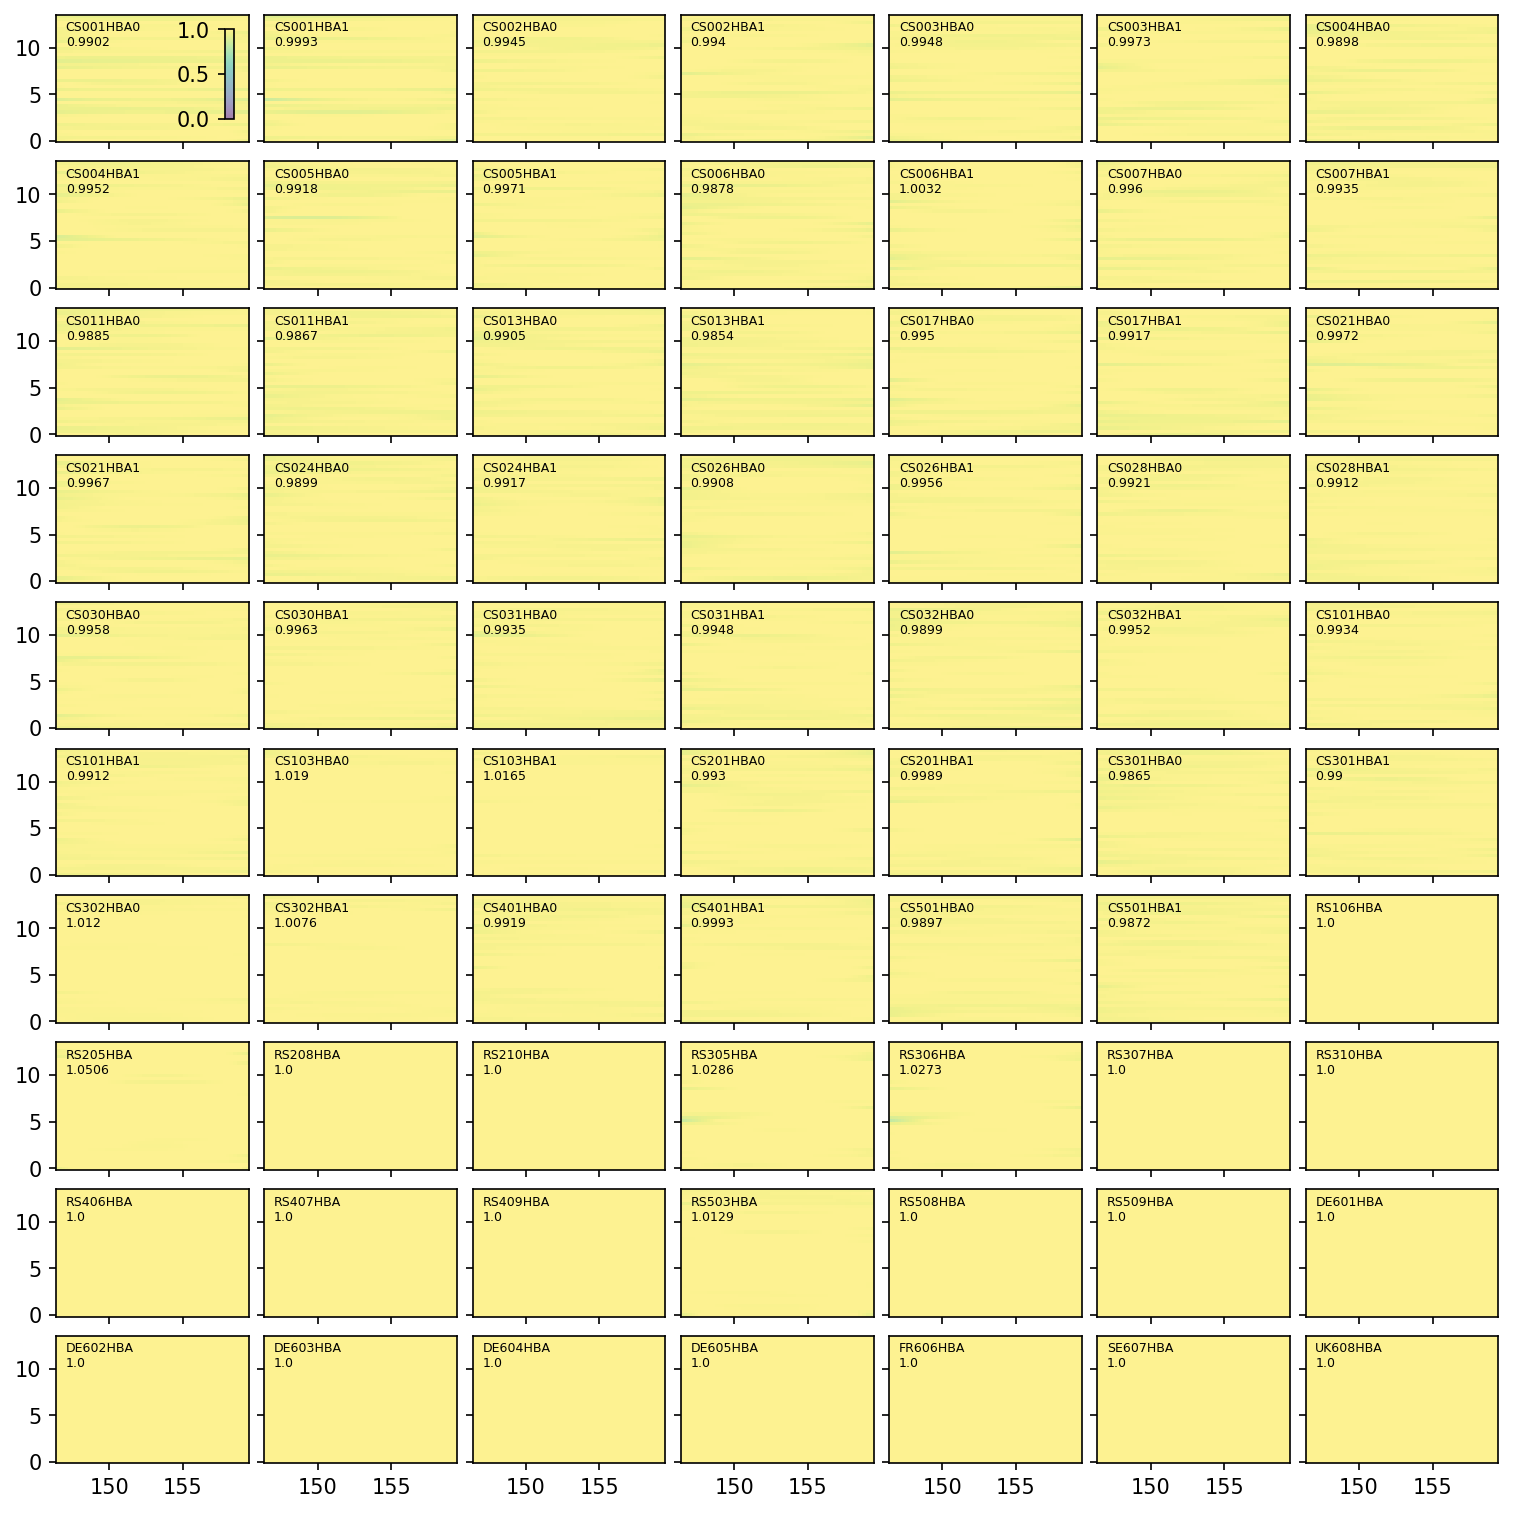

In [19]:
plot_dynspec(data, stations)